In [5]:
# Raphaela's Open Data Project


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [8]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [9]:
filepath = "XLS_files\walmart_chart.xlsx"
print("loading from file")

walmart_chart = pd.read_excel(filepath, skiprows= 1)
print("done")

loading from file
done


In [10]:
# Walmart's net sales from 2006 to 2019 (in billion U.S. dollars)

In [11]:
walmart_chart.head(50)

,Year,US$ Bn
0,2006,308.95
1,2007,344.76
2,2008,373.82
3,2009,401.09
4,2010,404.74
5,2011,418.50
6,2012,443.42
7,2013,465.60
8,2014,473.08
9,2015,482.23


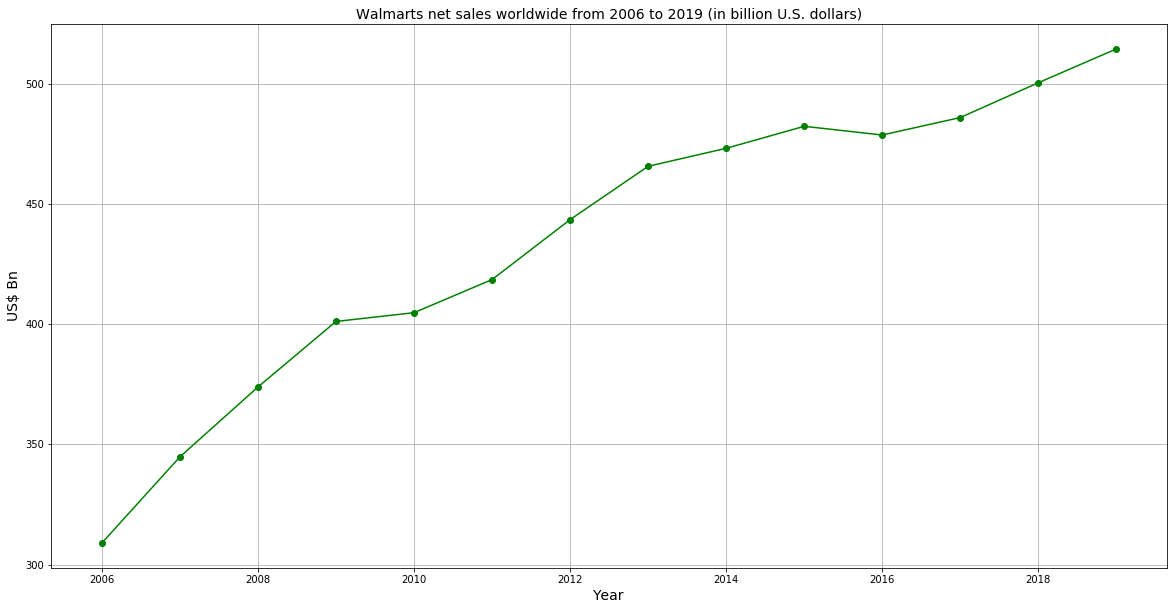

In [12]:

Data = {'Year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'US$ Bn': [308.95, 344.76, 373.82, 401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87, 500.34, 514.41]
       }
  
df = pd.DataFrame(Data,columns=['Year','US$ Bn'])
  
plt.plot(df['Year'], df['US$ Bn'], color='green', marker='o')
plt.title('Walmarts net sales worldwide from 2006 to 2019 (in billion U.S. dollars)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('US$ Bn', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 2', skiprows= 1)

In [14]:
# Walmart's net sales worldwide from 2008 to 2019, by division (in billion U.S. dollars)

In [15]:
excel_data_df.head(50)

,US$ Bn,Walmart U.S.,Walmart International,Sam's Club
0,2008,238.92,90.57,44.34
1,2009,256.97,96.14,47.98
2,2010,259.92,97.41,47.81
3,2011,260.26,109.23,49.46
4,2012,264.19,125.44,53.80
5,2013,274.43,134.75,56.42
6,2014,279.41,136.51,57.16
7,2015,288.05,136.16,58.02
8,2016,298.38,123.41,56.83
9,2017,307.83,116.12,57.37


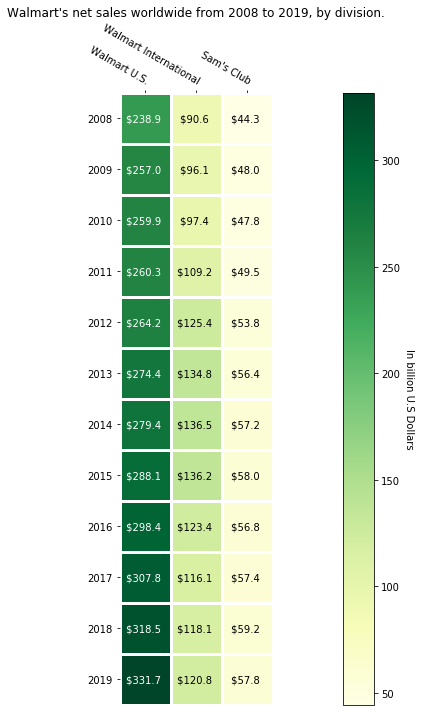

In [16]:
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.figure.Figure.colorbar
matplotlib.pyplot.colorbar

# sphinx_gallery_thumbnail_number = 2

year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
company = ["Walmart U.S.", "Walmart International", "Sam's Club"]

dollar = np.array([[238.92, 90.57, 44.34],
                    [256.97, 96.14, 47.98],
                    [259.92, 97.41, 47.81],
                    [260.26, 109.23, 49.46],
                    [264.19, 125.44, 53.80],
                    [274.43, 134.75, 56.42],
                    [279.41, 136.51, 57.16],
                    [288.05, 136.16, 58.02],
                    [298.38, 123.41, 56.83],
                    [307.83, 116.12, 57.37],
                    [318.48, 118.07, 59.22],                    
                    [331.67, 120.82, 57.84]])
        

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots()

im, cbar = heatmap(dollar, year, company, ax=ax,
                   cmap="YlGn", cbarlabel="In billion U.S Dollars")
texts = annotate_heatmap(im, valfmt="${x:.1f} ")

ax.set_title("Walmart's net sales worldwide from 2008 to 2019, by division.")
fig.tight_layout()
plt.show()


In [17]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 5', skiprows= 1)

In [18]:
# Share of Walmart's net sales from 2008 to 2019, by division

In [19]:
excel_data_df.head(50)

,Year,Walmart U.S.,Walmart International,Sam's Club
0,2008,0.639,0.242,0.119
1,2009,0.640,0.240,0.120
2,2010,0.642,0.240,0.118
3,2011,0.621,0.261,0.118
4,2012,0.596,0.283,0.121
5,2013,0.590,0.289,0.121
6,2014,0.590,0.289,0.121
7,2015,0.598,0.282,0.120
8,2016,0.623,0.258,0.119
9,2017,0.640,0.241,0.119


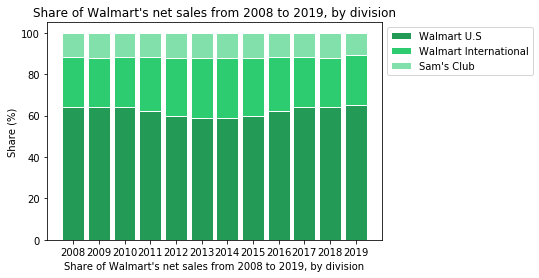

In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4,5,6,7,8,9,10,11]
raw_data = {'greenBars': [63.9, 64.0, 64.2, 62.1, 59.6, 59.0, 59.0, 59.8, 62.3, 64.0, 64.0, 65.0], 'orangeBars': [24.2, 24.0, 24.0, 26.1, 28.3,  28.9, 28.9, 28.2, 25.8, 24.1, 24.0, 24.0],'blueBars': [11.9, 12.0, 11.8, 11.8, 12.1, 12.1, 12.1, 12.0, 11.9, 11.9, 12.0, 11.0]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

# Create green Bars
plt.bar(r, greenBars, color='#239B56', edgecolor='white', width=barWidth, label="Walmart U.S")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#2ECC71', edgecolor='white', width=barWidth, label="Walmart International")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#82E0AA', edgecolor='white', width=barWidth, label="Sam's Club")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Share of Walmart's net sales from 2008 to 2019, by division")
 
plt.ylabel('Share (%)')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.title("Share of Walmart's net sales from 2008 to 2019, by division")
plt.show()


In [21]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 4', skiprows= 1)


In [22]:
# Growth in Walmart's net sales worldwide from 2006 to 2019

In [23]:
excel_data_df.head(50)

,Year,Growth in net sales
0,2006,0.098
1,2007,0.116
2,2008,0.084
3,2009,0.073
4,2010,0.009
5,2011,0.034
6,2012,0.060
7,2013,0.050
8,2014,0.016
9,2015,0.019


In [62]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 6', skiprows= 1)

Walmart's gross profit margin worldwide from 2006 to 2019

In [71]:
excel_data_df.head(50)

,Year,Gross profit margin
0,2006,0.231
1,2007,0.234
2,2008,0.241
3,2009,0.243
4,2010,0.249
5,2011,0.248
6,2012,0.245
7,2013,0.243
8,2014,0.243
9,2015,0.243


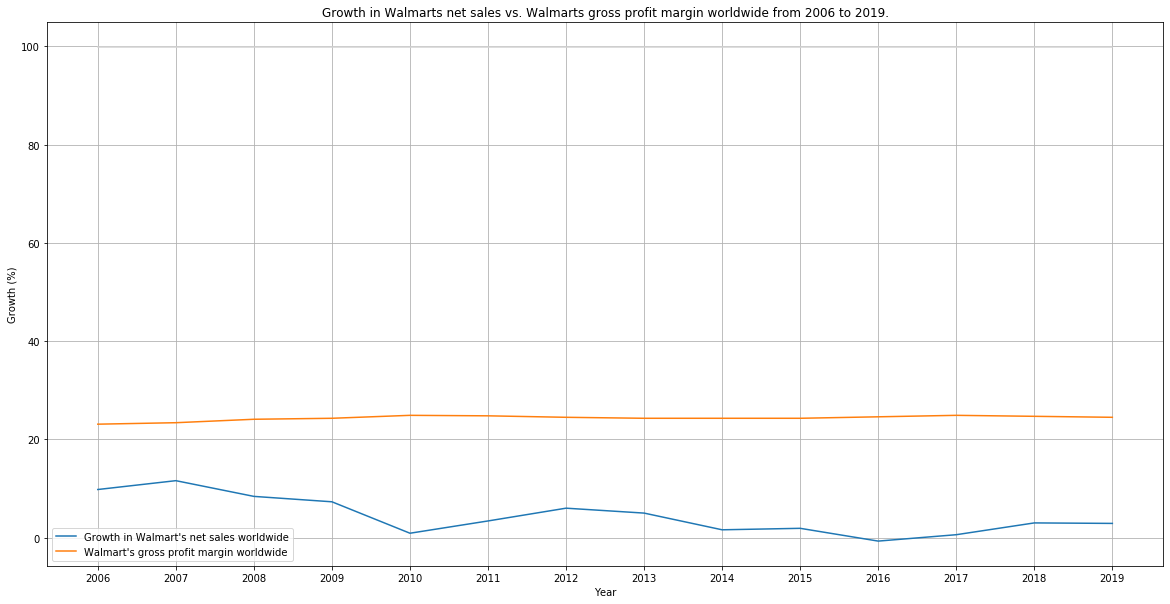

In [81]:
import matplotlib.pyplot as plt
# line 1 points
x1 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y1 = [9.8, 11.6, 8.4, 7.3, 0.9, 3.4, 6.0, 5.0, 1.6, 1.9, -0.7, 0.6, 3.0, 2.9]

# line 2 points
x2 = ['2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y2 = [23.10, 23.40, 24.10, 24.30, 24.90, 24.80, 24.50, 24.30, 24.30, 24.30, 24.60, 24.90, 24.70, 24.50]

# increase range - cheat way
x3 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y3 = [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9]
plt.plot(x3, y3, color='lightgrey')
# plotting the line 1 points 
plt.plot(x1, y1, label = "Growth in Walmart's net sales worldwide")
# plotting the line 2 points 
plt.plot(x2, y2, label = "Walmart's gross profit margin worldwide")
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Growth (%)')
# Set a title of the current axes.
plt.title('Growth in Walmarts net sales vs. Walmarts gross profit margin worldwide from 2006 to 2019.')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.grid(True)
plt.show()


In [5]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 9', skiprows= 1)

In [6]:
excel_data_df.head(50)

,Unnamed: 0,Spending in US$ Bn
0,2009,2.04
1,2010,2.06
2,2011,1.82
3,2012,1.81
4,2013,1.93
5,2014,1.94
6,2015,2.09
7,2016,2.17
8,2017,2.28


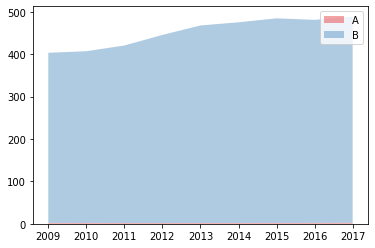

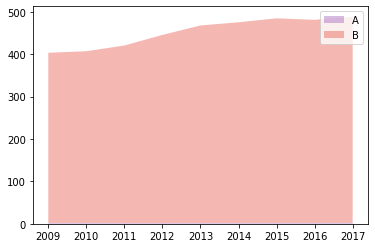

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Your x and y axis
x=['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017' ]
y=[ [2.04, 2.06, 1.82, 1.81, 1.93, 1.94, 2.09, 2.17, 2.28,], [401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87] ]
 
# use a known color palette (see..)
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['A','B'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.show()
 
# create your palette
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['A','B'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')


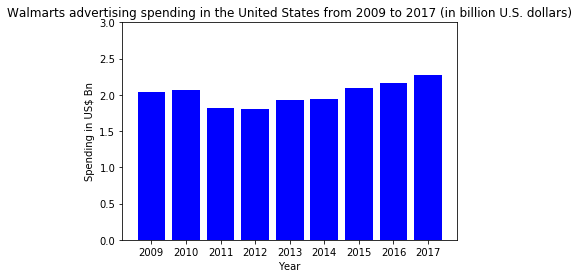

In [13]:
# Fake dataset
height = [2.04, 2.06, 1.82, 1.81, 1.93, 1.94, 2.09, 2.17, 2.28]
bars = ('2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color ='blue')
 
# Add title and axis names
plt.title('Walmarts advertising spending in the United States from 2009 to 2017 (in billion U.S. dollars)')
plt.xlabel('Year')
plt.ylabel('Spending in US$ Bn')
 
# Limits for the Y axis
plt.ylim(0,3)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [20]:
x1 = np.linspace(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)
x2 = np.linspace(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017)

plt.ylim(0,550.00)
plt.ylim(0,3)


plt.subplot(401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87, 500.34)
plt.plot(x1, y1, 'o-')
plt.title('Walmarts advertising spending vs.Walmarts net sales from 2009 to 2017 (in billion U.S. dollars)')
plt.ylabel('Damped oscillation')

plt.subplot(2.04, 2.06, 1.82, 1.81, 1.93, 1.94, 2.09, 2.17, 2.28)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

SyntaxError: invalid syntax (<ipython-input-20-355bf7738040>, line 9)

In [27]:
#t = np.arange(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017)
year = ('2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017')
y_pos = np.arange(len(year))
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('billion U.S. dollars', color=color)
ax1.plot(year, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('billion U.S. dollars', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Walmarts advertising spending vs.Walmarts net sales from 2009 to 2017 (in billion U.S. dollars)')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (999,)

df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

Series objects are _very_ similar to dictionaries. They have more properties though.

In [26]:
row_one["Chart SF1.2.A. Living arrangements of children, 2018a"]

NameError: name 'row_one' is not defined

Doing the same thing on a dataframe gives us the whole column

In [27]:
penalty_data["FACE_VALUE"]

NameError: name 'penalty_data' is not defined

In [28]:
penalty_data["FACE_VALUE"].plot()

NameError: name 'penalty_data' is not defined

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

In [29]:
penalty_data["FACE_VALUE"].hist()

NameError: name 'penalty_data' is not defined

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

In [30]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 3000].hist()

NameError: name 'penalty_data' is not defined

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [31]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [32]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [33]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [34]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",         "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca", "guineafowl",         "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal", "turkey", "Goldfish", 
        "rabbit", "Koi", "canary", "Society finch", "Fancy mouse", "Siamese fighting fish",         "Fancy rat and Lab rat", "mink", "red fox", "hedgehog", "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = ["o" in x for x in pets_series]
print(pattern_of_bools)

pets_series[pattern_of_bools]

[True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False]


0                   Dog
1                  Goat
9                Donkey
11        Water buffalo
12    Western honey bee
13      dromedary camel
14                Horse
15             silkmoth
16               pigeon
17                goose
22           guineafowl
24         muscovy duck
25         Barbary dove
29             Goldfish
31                  Koi
33        Society finch
34          Fancy mouse
38              red fox
39             hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

In [35]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 3000].hist()

NameError: name 'penalty_data' is not defined

Let's see what's under $1000

In [36]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [37]:
penalty_data["LEGISLATION"].value_counts()

NameError: name 'penalty_data' is not defined

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

In [38]:
penalty_data["LEGISLATION"].value_counts().plot(kind="bar")

NameError: name 'penalty_data' is not defined

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

In [39]:
pdvc = penalty_data["LEGISLATION"].value_counts()
pdvc[pdvc < 5000].plot(kind="bar")

NameError: name 'penalty_data' is not defined

This pattern keeps repeating itself:

In [40]:
pdvc[pdvc < 1000].plot(kind="bar")

NameError: name 'pdvc' is not defined

In [41]:
pdvc[pdvc < 100].plot(kind="bar")

NameError: name 'pdvc' is not defined

In [42]:
pdvc[pdvc < 10].plot(kind="bar")

NameError: name 'pdvc' is not defined

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [43]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

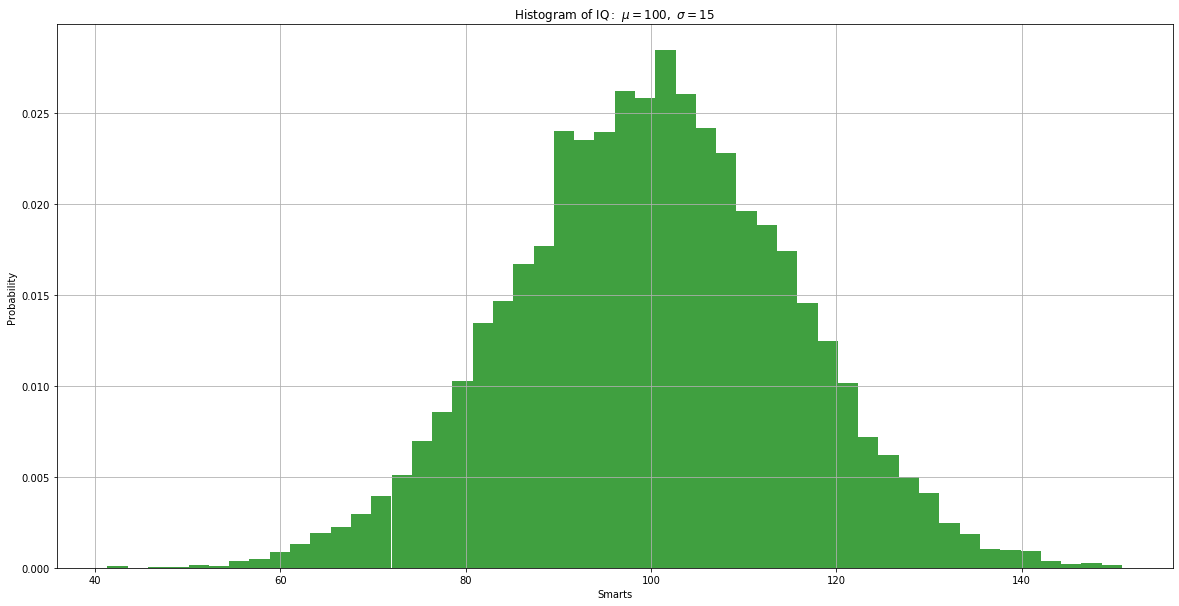

In [44]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

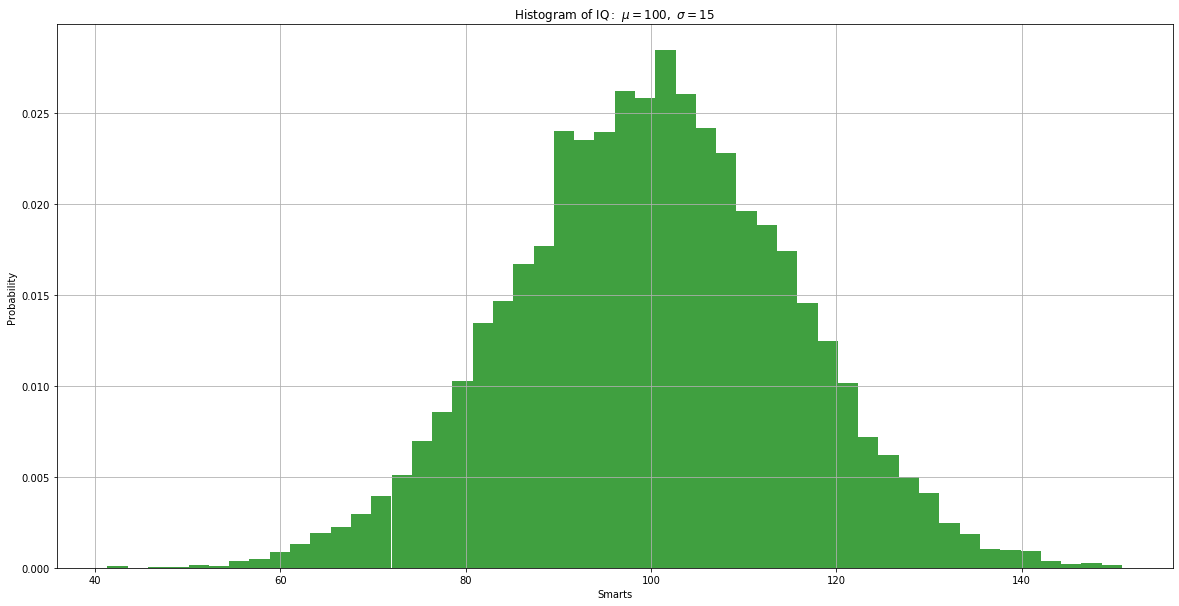

In [45]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

In [46]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

And this is how we'd change it so that we can add more features:

In [47]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

NameError: name 'penalty_data' is not defined

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [48]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

NameError: name 'penalty_data' is not defined

We can go back to our initial, unfiltered, data:

In [49]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

NameError: name 'penalty_data' is not defined

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

In [50]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

NameError: name 'penalty_data' is not defined

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

In [51]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

NameError: name 'penalty_data' is not defined

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

In [52]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

NameError: name 'penalty_data' is not defined

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [53]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

ValueError: 'OFFENCE_MONTH' is not in list

This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

In [54]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

NameError: name 'penalty_data' is not defined

In [55]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [56]:
ss = penalty_data.loc[:5]

NameError: name 'penalty_data' is not defined

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [57]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

Above is equivalent to below, it's up to you to decide what is more readable.

In [58]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [59]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_